In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

K means i nasıl sınıflandıracağımızı önceden bilmediğimiz veri setlerinde gruplandırma için kullanırız.

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df = df[["sepal length (cm)","sepal width (cm)"]]

In [6]:
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


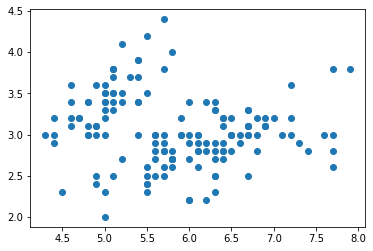

In [7]:
plt.scatter(df["sepal length (cm)"],df["sepal width (cm)"])

In [8]:
Scaler = MinMaxScaler()

In [9]:
Scaler.fit(df[["sepal length (cm)"]])
df["sepal length (cm)"] = Scaler.transform(df[["sepal length (cm)"]])

In [10]:
Scaler.fit(df[["sepal width (cm)"]])
df["sepal width (cm)"] = Scaler.transform(df[["sepal width (cm)"]])

In [11]:
df.head() ## minmax scaler ile 0 ilw 1 arasında değerler almasını sağladık özelliklerin sınıflandırmaya etkisi eşit olsun diye.

,sepal length (cm),sepal width (cm)
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667


In [12]:
km = KMeans(n_clusters=2) ## burada n_cluster 2 verdim denemek için 2 gruba ayırmak istedim.

In [13]:
y_predicted = km.fit_predict(df[["sepal length (cm)","sepal width (cm)"]])

In [14]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
df["cluster"] = y_predicted

In [16]:
df.head()

,sepal length (cm),sepal width (cm),cluster
0,0.222222,0.625000,0
1,0.166667,0.416667,0
2,0.111111,0.500000,0
3,0.083333,0.458333,0
4,0.194444,0.666667,0


In [17]:
df1 = df[df.cluster==0]

In [18]:
df2 = df[df.cluster==1]

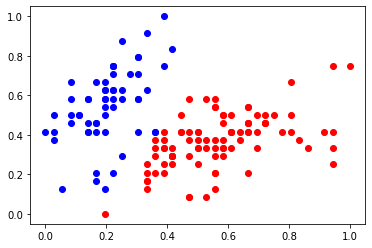

In [19]:
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],c="blue")
plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"],c="red")
plt.xlabel = "Sepal Length"
plt.ylabel = "Sepal Width"

In [20]:
k_range = range(1,10)

In [21]:
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[["sepal length (cm)","sepal width (cm)"]])
    sse.append(km.inertia_)

C:\Users\FURKANSALMAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


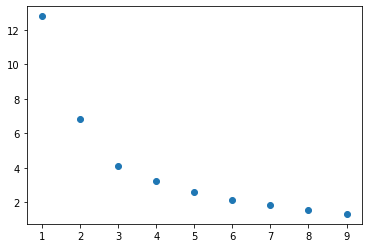

In [22]:
plt.scatter(k_range,sse)

Burada 3 grup olarak sınıflandırmaya kadar sert bir şekilde hatanın düştüğünü ondan sonra daha az azalmaya başladığını görüyoruz.

In [23]:
km_son = KMeans(n_clusters=3)

In [24]:
y_new = km_son.fit_predict(df[["sepal length (cm)","sepal width (cm)"]])

In [25]:
df["cluster"] = y_new

In [26]:
df.head()

,sepal length (cm),sepal width (cm),cluster
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1


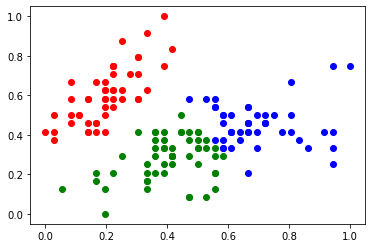

In [27]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],c="blue")
plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"],c="red")
plt.scatter(df3["sepal length (cm)"],df3["sepal width (cm)"],c="green")
plt.xlabel = "Sepal Length"
plt.ylabel = "Sepal Width"

In [28]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

3 Grup en doğrusu çünkü zaten 3 tür çiçek içeriyordu veri setimiz.

In [29]:
new_df = df

In [30]:
new_df.cluster = iris.target

In [31]:
new_df

,sepal length (cm),sepal width (cm),cluster
0,0.222222,0.625000,0
1,0.166667,0.416667,0
2,0.111111,0.500000,0
3,0.083333,0.458333,0
4,0.194444,0.666667,0
...,...,...,...
145,0.666667,0.416667,2
146,0.555556,0.208333,2
147,0.611111,0.416667,2
148,0.527778,0.583333,2


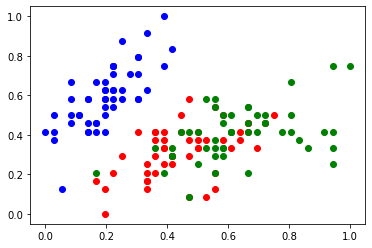

In [32]:
new_df1 = new_df[new_df.cluster==0]
new_df2 = new_df[new_df.cluster==1]
new_df3 = new_df[new_df.cluster==2]
plt.scatter(new_df1["sepal length (cm)"],new_df1["sepal width (cm)"],c="blue")
plt.scatter(new_df2["sepal length (cm)"],new_df2["sepal width (cm)"],c="red")
plt.scatter(new_df3["sepal length (cm)"],new_df3["sepal width (cm)"],c="green")
plt.xlabel = "Sepal Length"
plt.ylabel = "Sepal Width"

Gerçek sonuçlarla karşılaştırdığımızda sadece var olan 4 özelliğin 2si ile bile az çok başarılı bir gruplandırma yapabiliyoruz.